In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
dataset = pd.read_csv(r'C:\Users\shark\Desktop\ML Learn\WSCubeTech Part 2\Dataset\Social_Network_Ads.csv')

In [3]:
dataset.drop(['User ID','Gender'], axis=1, inplace=True)

In [4]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

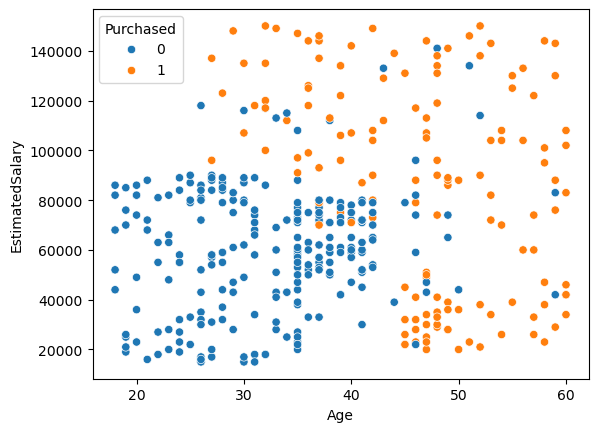

In [5]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=dataset, hue='Purchased')

In [6]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
x = dataset.iloc[:, :-1]
y = dataset["Purchased"]

In [8]:
print(x.head(3))
print(y)

   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [10]:
sc.fit(x)
x = sc.transform(x)

In [11]:
x = pd.DataFrame(x, columns=['Age', 'EstimatedSalary'])
x.head(3)

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [14]:
classifier_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
classifier_gini.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
print(classifier_gini.score(x_test, y_test)*100)
print(classifier.score(x_test, y_test)*100)

83.75
83.75


In [16]:
classifier.score(x_test, y_test)*100

83.75

In [17]:
classifier.predict([[19,76000]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [18]:
from sklearn.tree import plot_tree

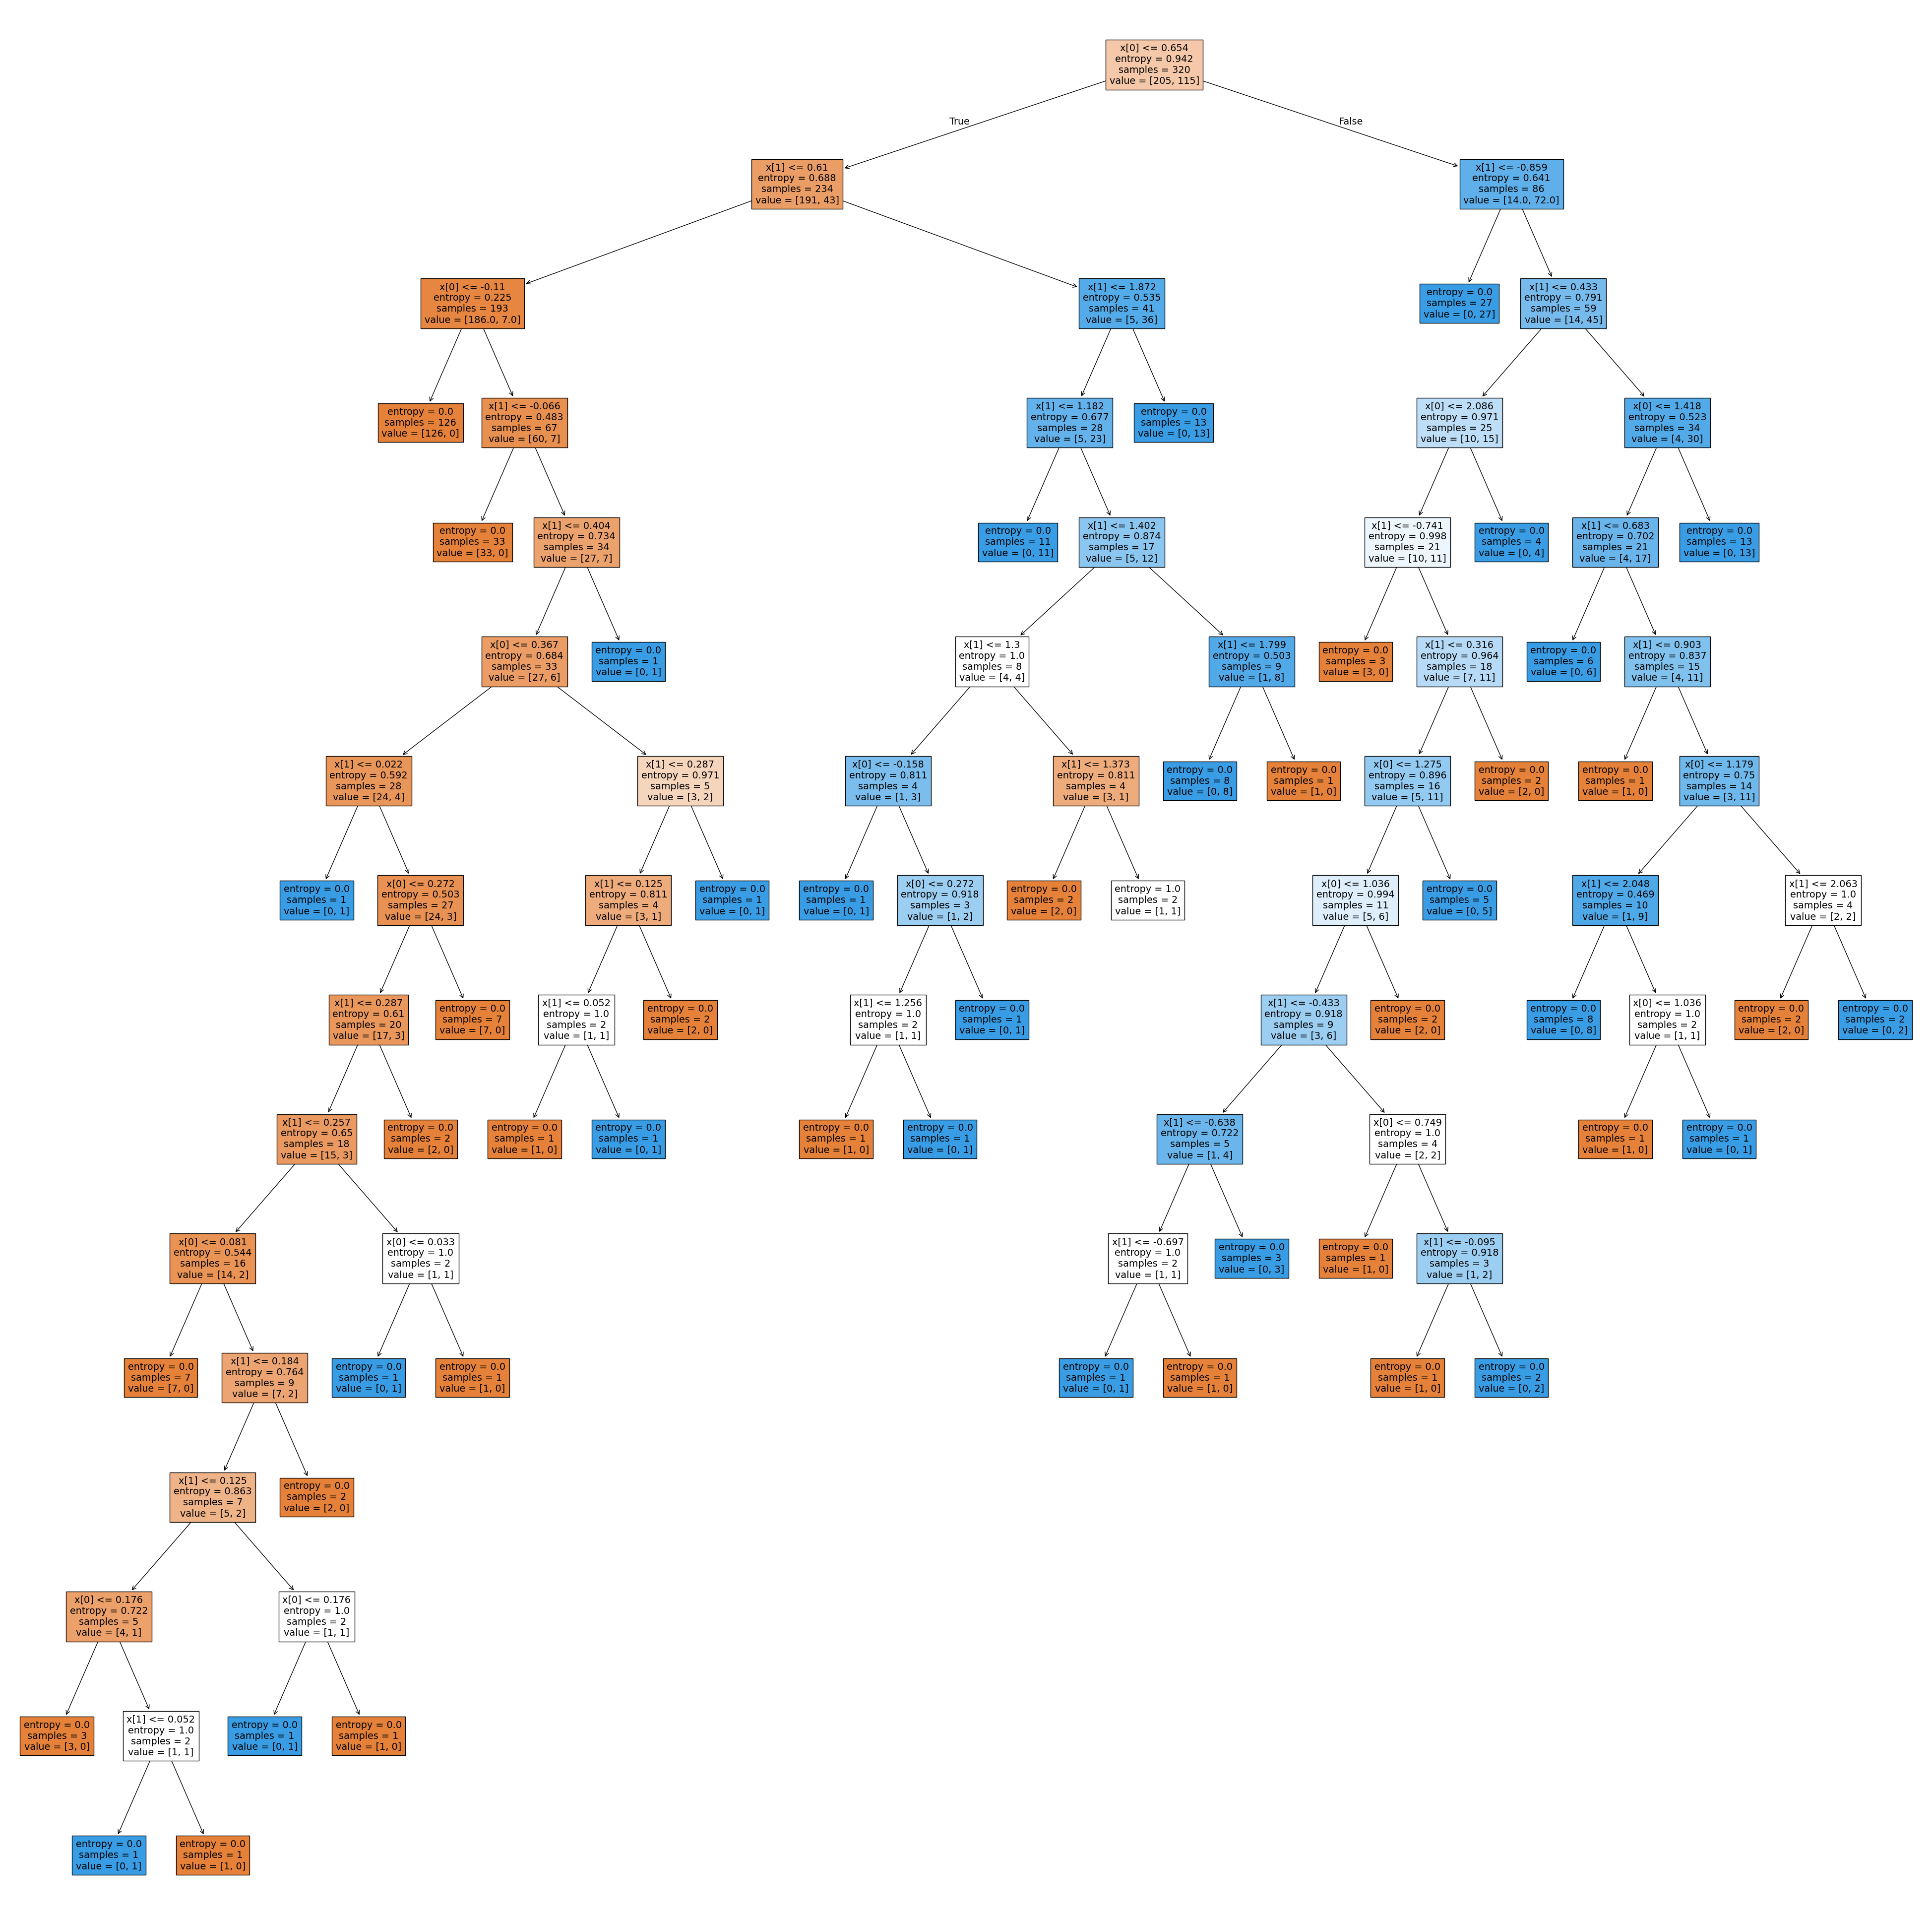

In [19]:
plt.figure(figsize=(50,50))
plot_tree(classifier, filled=True)
plt.savefig('DecisionTree.png')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'Age')

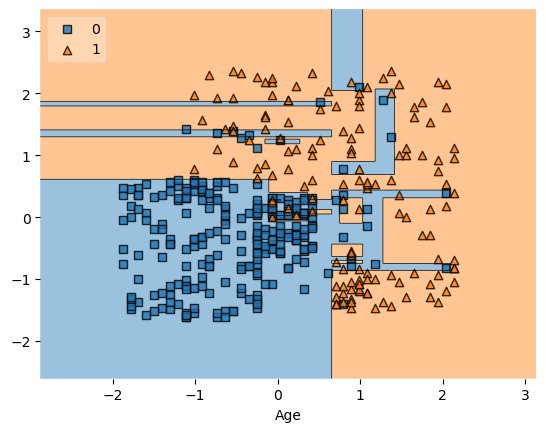

In [20]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=classifier, legend=2)
plt.xlabel(x.columns[0])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'Age')

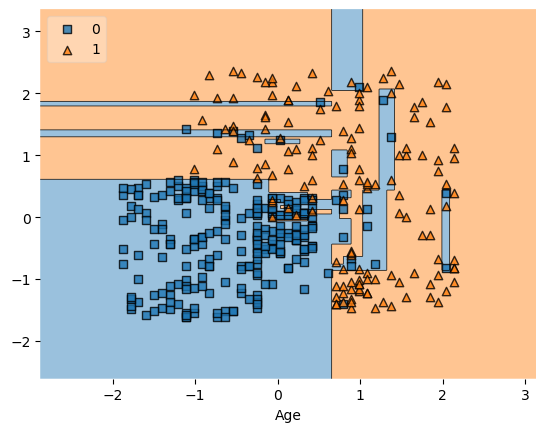

In [21]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=classifier_gini, legend=2)
plt.xlabel(x.columns[0])